# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [5]:
import pandas as pd

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

404 registros con 13 columnas para entrenar y 102 registros con 13 columnas para evaluar

In [7]:
y_train.shape, y_test.shape

((404,), (102,))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. 

2. La variable objetivo a predecir es MEDV: Median value of owner-occupied homes in $1000’s

3. Atributos disponibles:

    - CRIM per capita crime rate by town
    - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS proportion of non-retail business acres per town (proporción de acres comerciales no minoristas por ciudad)
    - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX nitric oxides concentration (parts per 10 million)
    - RM average number of rooms per dwelling
    - AGE proportion of owner-occupied units built prior to 1940
    - DIS weighted distances to five Boston employment centres
    - RAD index of accessibility to radial highways
    - TAX full-value property-tax rate per $10,000
    - PTRATIO pupil-teacher ratio by town
    - B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
    - LSTAT % lower status of the population

4. RM - AGE - DIS

5. 

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

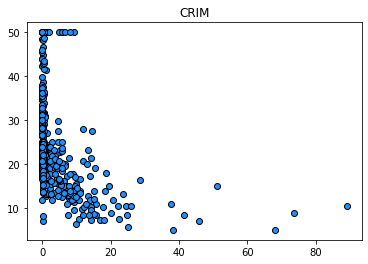

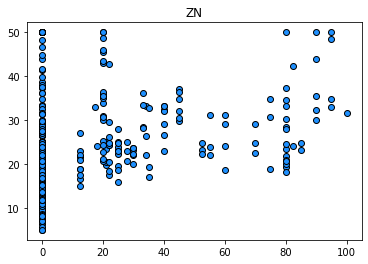

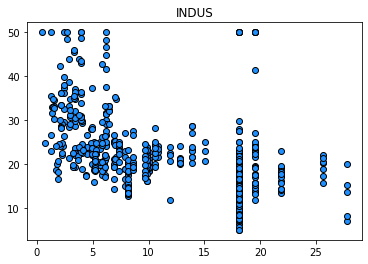

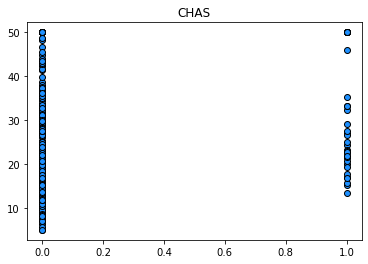

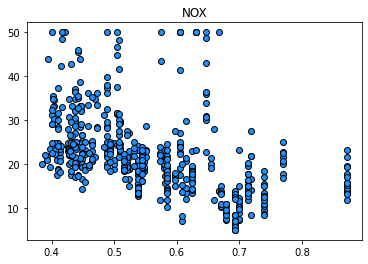

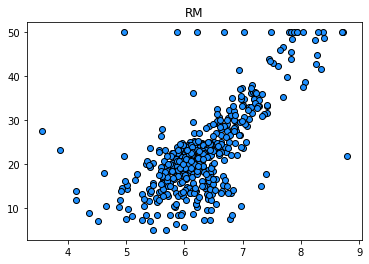

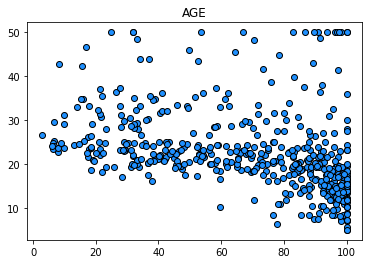

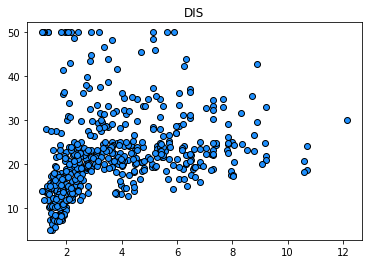

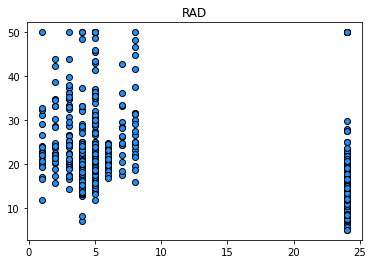

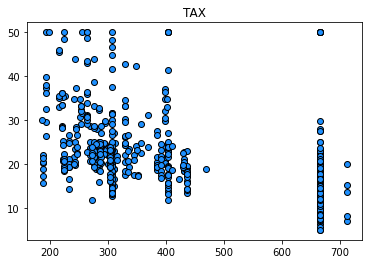

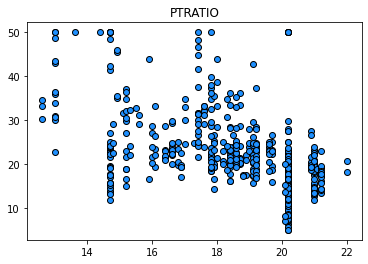

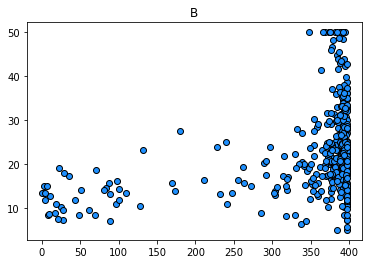

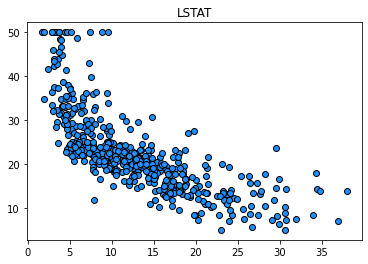

In [8]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

# ZN
selector = (boston['feature_names'] == 'ZN')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('ZN')
plt.show()

# INDUS
selector = (boston['feature_names'] == 'INDUS')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('INDUS')
plt.show()

# CHAS
selector = (boston['feature_names'] == 'CHAS')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('CHAS')
plt.show()

# NOX
selector = (boston['feature_names'] == 'NOX')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('NOX')
plt.show()

# RM
selector = (boston['feature_names'] == 'RM')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('RM')
plt.show()

# AGE
selector = (boston['feature_names'] == 'AGE')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('AGE')
plt.show()

# DIS
selector = (boston['feature_names'] == 'DIS')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('DIS')
plt.show()

# RAD
selector = (boston['feature_names'] == 'RAD')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('RAD')
plt.show()

# TAX
selector = (boston['feature_names'] == 'TAX')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('TAX')
plt.show()

# PTRATIO
selector = (boston['feature_names'] == 'PTRATIO')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('PTRATIO')
plt.show()

# B
selector = (boston['feature_names'] == 'B')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('B')
plt.show()

# LSTAT
selector = (boston['feature_names'] == 'LSTAT')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('LSTAT')
plt.show()


2 Estudie las gráficas, identificando a ojo los atributos que a su criterio sean los más informativos para la predicción.
Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

3 Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [9]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [10]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_f, y_train)

LinearRegression()

In [11]:
# 3. Predecir
y_pred_lr = lr.predict(X_test_f)
y_pred_lr

array([22.90445223, 21.80741526, 23.2795076 , 13.67809006, 21.95743741,
       18.22563646, 18.89135974, 19.48207195, 10.15256956, 23.5795519 ,
       19.37893173, 25.94240075, 22.9794633 ,  7.1427502 , 36.67836079,
       29.54293232, 22.05120126, 31.84952286, 24.90162209, 18.37565861,
       23.77645597, 18.65695014, 20.97291706, 24.30153349, 16.80042604,
       -0.25521702, 19.4539428 , 17.05358842, 39.1818554 , 20.64474361,
       21.51674735, 20.54160338, 21.90117911, 20.67287276, 23.68269213,
       17.93496854, 19.66022326, 18.61006821, 23.04509799, 21.30109051,
       20.97291706, 17.77557001, 21.13231559, 14.40944804, 24.84536378,
       23.72957405, 17.81307555, 20.99166983,  9.49622266, 26.59874765,
       21.20732667, 16.68790943, 19.60396495, 40.96336842, 17.50365486,
       18.74133759, 17.02545926, 18.82572505, 17.50365486, 19.40706088,
       18.69445567, 20.84164768, 28.98972565, 24.95788039, 17.09109396,
       24.99538593, 25.92364798, 23.31701314, 27.77079569, 18.76

In [12]:
# 3. Evaluar
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_lr))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_lr))

Mean squared error: 46.91
Coefficient of determination: 0.42


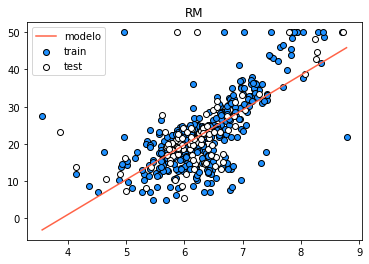

In [13]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, lr.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
#plt.scatter(X_test_f, y_pred_lr, facecolor="red", edgecolor="k", label="pred")
plt.title(feature)
plt.legend()
plt.show()

In [14]:
df_2 = pd.DataFrame(X_test, columns=data.feature_names)
df_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


In [15]:
df_2['real_price'] = y_test
df_2['pred_price'] = y_pred_lr

In [16]:
df_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,real_price,pred_price
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6,22.904452
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,21.807415
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0,23.279508
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3,13.678090
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2,21.957437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7,23.373271
98,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13,14.1,24.704718
99,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15,18.7,17.353633
100,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4.0,277.0,18.6,385.81,9.38,28.1,23.298260


## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [17]:
# 1. Resolver acá.

"""from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train_f, y_train)

#  Predecir
y_pred_pr = polyreg.predict(X_test_f)
y_pred_pr"""

'from sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.pipeline import make_pipeline\n\ndegree=2\npolyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())\npolyreg.fit(X_train_f, y_train)\n\n#  Predecir\ny_pred_pr = polyreg.predict(X_test_f)\ny_pred_pr'

In [18]:
# Evaluar
"""from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_pr))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_pr))"""

"from sklearn.metrics import mean_squared_error, r2_score\n# The mean squared error\nprint('Mean squared error: %.2f'\n      % mean_squared_error(y_test, y_pred_pr))\n# The coefficient of determination: 1 is perfect prediction\nprint('Coefficient of determination: %.2f'\n      % r2_score(y_test, y_pred_pr))"

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] #pruebo grados de polinomio. en casa caso entreno

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr2 = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr2)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error_RM = mean_squared_error(y_train, y_train_pred)
    test_error_RM = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_RM.round(2), 'grado del polinomio ', degree)
    print('Test error: ', test_error_RM.round(2), 'grado del polinomio ', degree)
    train_errors.append(train_error_RM)
    test_errors.append(test_error_RM)

Train error:  85.14 grado del polinomio  0
Test error:  81.58 grado del polinomio  0
Train error:  42.82 grado del polinomio  1
Test error:  46.91 grado del polinomio  1
Train error:  37.75 grado del polinomio  2
Test error:  39.79 grado del polinomio  2
Train error:  36.4 grado del polinomio  3
Test error:  39.83 grado del polinomio  3
Train error:  34.81 grado del polinomio  4
Test error:  41.55 grado del polinomio  4
Train error:  33.13 grado del polinomio  5
Test error:  41.04 grado del polinomio  5
Train error:  33.13 grado del polinomio  6
Test error:  41.01 grado del polinomio  6
Train error:  33.06 grado del polinomio  7
Test error:  42.39 grado del polinomio  7
Train error:  33.06 grado del polinomio  8
Test error:  42.4 grado del polinomio  8
Train error:  32.85 grado del polinomio  9
Test error:  46.05 grado del polinomio  9


Si los datos de entrenamiento tienen una tasa de error baja y los datos de prueba tienen una tasa de error alta, indica un sobreajuste.

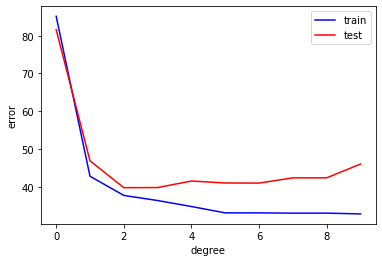

In [22]:
# 2. Graficar curvas de error acá.

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

3. Podemos observar que el overfitting commienza luego del grado de polimonio 2.


De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 2:

In [23]:
# 4. Reconstruir mejor modelo acá y graficar.

# train:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

# predict:
y_train_pred_2 = model.predict(X_train_f)
y_test_pred_2 = model.predict(X_test_f)

# evaluate:
train_error_RM = mean_squared_error(y_train, y_train_pred_2)
test_error_RM = mean_squared_error(y_test, y_test_pred_2)
print('Train error: ' , train_error_RM.round(2), 'grado del polinomio ', degree)
print('Test error: ', test_error_RM.round(2), 'grado del polinomio ', degree)

Train error:  37.75 grado del polinomio  2
Test error:  39.79 grado del polinomio  2


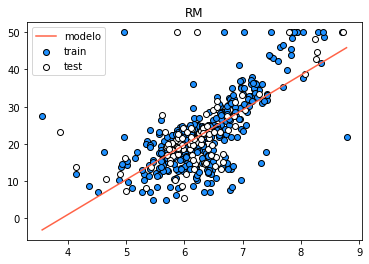

In [26]:
# 4. Graficar 
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, lr.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(feature)
plt.legend()
plt.show()

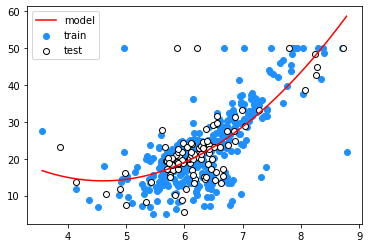

In [28]:
plt.scatter(X_train_f, y_train, color="dodgerblue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
#plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()   

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [43]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'AGE')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [48]:
# 2. Resolver acá.

degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] #pruebo grados de polinomio. en casa caso entreno

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr3 = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr3)
    print(X_train_fs.shape, y_train.shape)
    model.fit(X_train_fs, y_train)
    
"""    # predict:
    y_train_pred_3 = model.predict(X_train_fs)
    y_test_pred_3 = model.predict(X_test_fs)
    
    # evaluate:
    train_error_2 = mean_squared_error(y_train, y_train_pred_3)
    test_error_2 = mean_squared_error(y_test, y_test_pred_3)
    print('Train error: ' , train_error_2.round(2), 'grado del polinomio ', degree)
    print('Test error: ', test_error_2.round(2), 'grado del polinomio ', degree)   """

(404, 2) (404,)


ValueError: could not broadcast input array from shape (404,2) into shape (404,0)

In [49]:
degree = 2
# train:
pf = PolynomialFeatures(degree)
lr3 = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr3)
print(X_train_fs.shape, y_train.shape)
model.fit(X_train_fs, y_train)

(404, 2) (404,)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [40]:
# predict:
y_train_pred_3 = model.predict(X_train_fs)
y_test_pred_3 = model.predict(X_test_fs)
print(y_train_pred_3)
print(y_test_pred_3)

[24.90481432 21.34847076 29.58804382 20.39105991 15.20724397 14.85743809
 19.90644729 26.55365216 22.89139215 14.47817516 17.09775315 18.91959238
 14.15148643 21.39650811 17.26608498 17.99399841 14.07602684 47.84917725
 29.29405314 13.90631722 18.64798177 20.56041688 19.0281299  15.7105173
 33.79250147 18.02229466 21.17488439 34.92524435 18.50289803 22.75737094
 15.61455207 15.90226386 25.79937155 36.49019333 21.34781065 13.72270366
 29.17773062 17.98330574 18.39224312 21.31684678 30.11482895 26.76596837
 23.65593814 16.35595682 34.88284034 32.71303894 20.19242818 13.90823219
 22.96683359 24.31998372 13.65958071 25.31691967 17.68629053 24.97711814
 16.57371934 17.72981685 19.36245203 14.33157511 16.22561947 18.64733461
 31.8617423  32.7527719  31.50918496 22.42369077 21.83884648 24.69536743
 20.06707688 15.93510977 27.8092297  14.05025148 19.83530129 18.2220258
 20.96397493 16.62614599 17.58501614 17.11756746 28.89013982 21.41340445
 20.09398254 20.1684414  20.83043453 16.28346535 16.1

In [41]:
# evaluate:
train_error_2 = mean_squared_error(y_train, y_train_pred_3)
test_error_2 = mean_squared_error(y_test, y_test_pred_3)
print('Train error: ' , train_error_2.round(2), 'grado del polinomio ', degree)
print('Test error: ', test_error_2.round(2), 'grado del polinomio ', degree)  

Train error:  29.87 grado del polinomio  2
Test error:  39.6 grado del polinomio  2


## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
